In [140]:
import numpy as np
import matplotlib.pyplot as plt

# Generate data

a) Pick $w_0$ uniformly at random on $[-\frac{1}{4}, \frac{1}{4}]$

b) Pick $w_1$ uniformly at random on $[-1,1]$

c) Pick $w_2$ uniformly at random on $[-1,1]$

d) Pick $n = 100$ vectors $\mathbf{x_1},\dots,\mathbf{x_n}$ independently and uniformly at random on $[-1, 1]^2$, call the collection of these vectors $\mathcal{S}$.

e) Let $\mathcal{S_1} \subset \mathcal{S}$ denote the collection of all $\mathbf{x} = \begin{bmatrix}x_1 & x_2\end{bmatrix} \in \mathcal{S}$ satisfying 
$$\begin{bmatrix}1 & x_1 & x_2\end{bmatrix}\begin{bmatrix}w_0 & w_1 & w_2\end{bmatrix}^T \ge 0$$

f) Let $\mathcal{S_0} \subset \mathcal{S}$ denote the collection of all $\mathbf{x} = \begin{bmatrix}x_1 & x_2\end{bmatrix} \in \mathcal{S}$ satisfying 
$$\begin{bmatrix}1 & x_1 & x_2\end{bmatrix}\begin{bmatrix}w_0 & w_1 & w_2\end{bmatrix}^T < 0$$

In [141]:
def generate_training_data(num_samples, seed=None):
    if seed is None:
        rng = np.random.default_rng()
    else:
        rng = np.random.default_rng(seed=seed)
    
    # Generate random bias and weights
    w0 = rng.uniform(low=-0.25, high=0.25)
    w1, w2 = rng.uniform(low=-1, high=1, size=2)
    
    # Generate inputs
    S = rng.uniform(low=-1, high=1, size=(num_samples,2))
    
    # Generate labels
    # True: v >= 0, sample input is in S1
    # False: v < 0, sample input is in S0
    desired_output = (np.dot(np.insert(S, 0, 1, axis=1), [w0, w1, w2]) >= 0)
    
    return S, (w0, w1, w2), desired_output


# Plot data and decision boundary 

g) In one plot, show the line $w_0 + w_1x_1 + w_2x_2 = 0$, with $x_1$ being the "$x$-axis", and $x_2$ being the "$y$-axis". In the same plot, show all the points in $\mathcal{S_1}$ and all the points in $\mathcal{S_0}$. Use different symbols for $\mathcal{S_0}$ and $\mathcal{S_1}$. An example figure may be as shown in Fig. 1 (My labels look bad, I expect you to do a better job!)

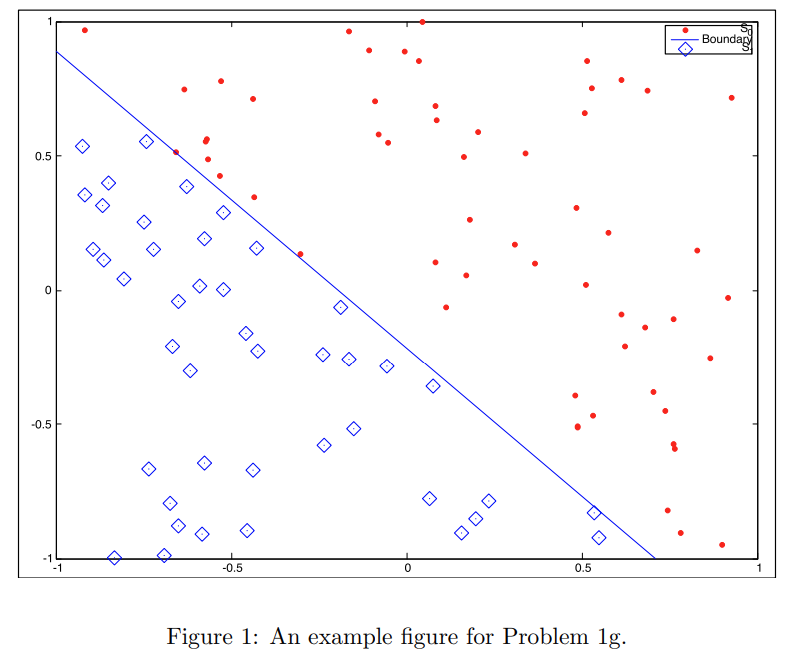

In [142]:
def plot_data(S, weights, desired_output, title, save=True):
    S0 = S[desired_output]
    S1 = S[~desired_output]
    
    plt.figure()
    
    # Plot S0
    plt.scatter(
        S0[:, 0], S0[:, 1], 
        color='tab:red', marker='x',
        label='S0'
    )

    # Plot S1
    plt.scatter(
        S1[:, 0], S1[:, 1], 
        color='tab:blue', marker='P',
        label='S1'
    )

    # Plot line w0 + w1x1 + w2x2 = 0
    # x2 = (-w0 - w1x1) / w2
    x1 = np.linspace(-1, 1, len(S))
    x2 = (-weights[0] - weights[1] * x1) / weights[2]
    
    plt.plot(
        x1, x2,
        color='black',
        label='boundary'
    )

    plt.legend(loc='upper right')
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    plt.title(title)
    
    plt.savefig(f"{title}.png", dpi=300)

# Perceptron Training Algorithm

h) Use the perceptron training algorithm to find the weights that can separate the two classes $\mathcal{S_0}$ and $\mathcal{S_1}$. (Obviously, you already know such weights, they are $w_0$, $w_1$, and $w_2$ above, but we will find the weights from scratch, and the training sets $\mathcal{S_0}$ and $\mathcal{S_1}$). In detail,

- i) Use the training parameter $\eta = 1$
- ii) Pick $w_0'$, $w_1'$, $w_2'$ independently and uniformly at random on $[-1, 1]$. Write them in your report.
- iii) Record the number of misclassifications if we use the weights $\begin{bmatrix}w_0' & w_1' & w_2'\end{bmatrix}$
- iv) After one epoch of the perceptron training algorithm, you will find a new set of weights $\begin{bmatrix}w_0'' & w_1'' & w_2''\end{bmatrix}$.
- v) Record the number of misclassifcations if we use the weights $\begin{bmatrix}w_0'' & w_1'' & w_2''\end{bmatrix}$.
- vi) Do another epoch of the perceptron training algorithm, find a new set of weights, record the number of misclassifications, and so on, until convergence.
- vii) Write down the final weights you obtain in your report. How do these weights compare to the "optimal" weights $\begin{bmatrix}w_0 & w_1 & w_2\end{bmatrix}$?

In [143]:
def pta(S, desired_output, eta, verbose=False, seed=None):
    num_samples = len(S)
    epoch = 0
        
    # Randomly initialize weights (and bias)
    if seed is None:
        rng = np.random.default_rng()
    else:
        rng = np.random.default_rng(seed=seed)
    
    weights = rng.uniform(low=-1, high=1, size=3)
    
    # Calculate number of correct classifications
    misclassifications = []
    output = (np.dot(np.insert(S, 0, 1, axis=1), weights) >= 0)
    num_correct = np.sum(~(desired_output ^ output))

    # Record number of misclassifications for plotting
    misclassifications.append(num_samples - num_correct)

    if verbose:
        print(f"Epoch {epoch}, {eta=}")
        print(f"\t{weights=}")
        print(f"\t{num_correct} of {num_samples} correct") 
    
    while(num_correct != num_samples):
        # Start next epoch
        epoch += 1
        
        # Calculate new outputs
        output = (np.dot(np.insert(S, 0, 1, axis=1), weights) >= 0)
                
        # Update weights according to type of misprediction
        for i in range(num_samples):
            if desired_output[i] and not output[i]:
                weights = weights + eta * np.insert(S[i], 0, 1)
            elif not desired_output[i] and output[i]:
                weights = weights - eta * np.insert(S[i], 0, 1)
            else:
                pass

        # Calculate new outputs
        output = (np.dot(np.insert(S, 0, 1, axis=1), weights) >= 0)
        num_correct = np.sum(~(desired_output ^ output))
        misclassifications.append(num_samples - num_correct)
        
        # Perform updates for each incorrect 
        if verbose:
            print(f"Epoch {epoch}, {eta=}")
            print(f"\t{weights=}")
            print(f"\t{num_correct} of {num_samples} correct") 
        
    return misclassifications

Epoch 0, eta=1
	weights=array([0.14626131, 0.05698229, 0.52730048])
	84 of 100 correct
Epoch 1, eta=1
	weights=array([-15.85373869,   1.37736637,   3.14039711])
	50 of 100 correct
Epoch 2, eta=1
	weights=array([34.14626131,  4.13833094, 24.65733454])
	50 of 100 correct
Epoch 3, eta=1
	weights=array([-15.85373869,   0.60657946,  47.690302  ])
	82 of 100 correct
Epoch 4, eta=1
	weights=array([ 2.14626131,  5.39029576, 49.25440069])
	97 of 100 correct
Epoch 5, eta=1
	weights=array([ 5.14626131,  5.96512363, 49.02904488])
	99 of 100 correct
Epoch 6, eta=1
	weights=array([ 4.14626131,  6.78853904, 49.01448312])
	100 of 100 correct


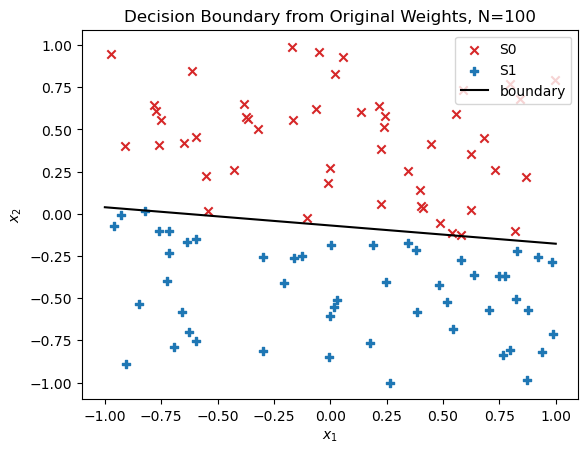

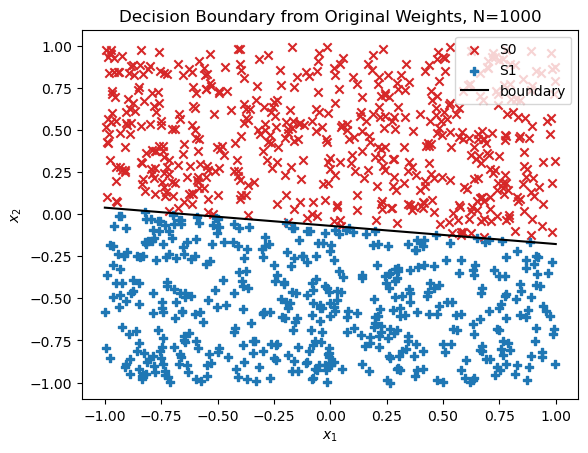

In [ ]:
seed=12345

misclassifications = {num_samples: {eta: 0 for eta in [1, 0.1, 10]} for num_samples in [100, 1000]}

for num_samples in [100, 1000]:
    S, weights, desired_output = generate_training_data(num_samples=num_samples, seed=seed)
    
    plot_data(S, weights, desired_output, title=f"Decision Boundary from Original Weights, N={num_samples}")
    
    for eta in [1, 0.1, 10]:
        verbose = (num_samples == 100) and (eta == 1)
        # verbose = True
        misclassifications[num_samples][eta] = pta(S, desired_output, eta=eta, verbose=verbose, seed=seed)


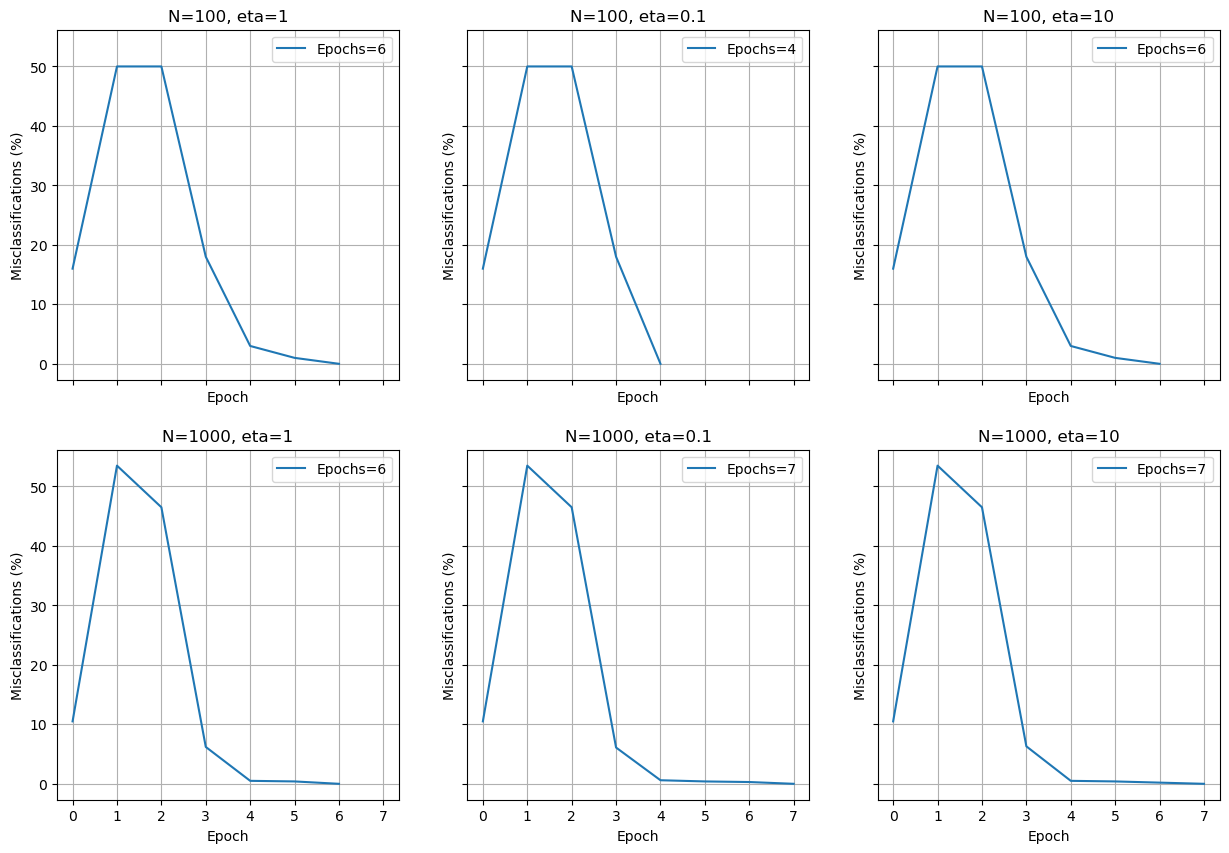

In [145]:
# Plot 2x3 grid
# 2 rows = num_samples
# 3 cols = eta
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

for i, num_samples in enumerate([100, 1000]):
    for j, eta in enumerate([1, 0.1, 10]):
        axs[i, j].plot(
            np.arange(len(misclassifications[num_samples][eta])), 
            (np.array(misclassifications[num_samples][eta]) / num_samples) * 100,
            label=f"Epochs={len(misclassifications[num_samples][eta]) - 1}"
        )
        axs[i, j].legend(loc='upper right')
        axs[i, j].set_title(f"N={num_samples}, eta={eta}")
        axs[i, j].set_xlabel("Epoch")
        axs[i, j].set_ylabel("Misclassifications (%)")
        axs[i, j].grid()
        
plt.savefig("epochs_vs_misclassifications.png", dpi=300)